## 1. Working with grades data   处理成绩数据

The dataset is called betyg_o_prov_riksnivå.xlsx and found here.

  a) Draw a line chart for proportion of students that are missing approved grade for one or more subjects for the years 18-23.

  b) Examine other variable(s) of your choice and check how they affect the students grade. For example you could choose "föräldrarnas utbildningsbakgrund", parents grades.

  c) Feel free to do more EDA on this dataset.


a) 绘制 18-23 年级一个或多个科目未获得批准成绩的学生比例的折线图。
b) 检查您选择的其他变量，并检查它们如何影响学生成绩。例如，您可以选择“föräldrarnas utbildningsbakgrund”，即父母的成绩。
c) 可以随意对此数据集进行更多 EDA。

In [5]:
import pandas as pd 
import matplotlib as plt
import seaborn as sns

df = pd.read_excel("data/betyg_o_prov_riksnivå.xlsx", sheet_name=None)
df

{'Tabell 1A':               Grundskolan – Betyg och Prov – Riksnivå  \
 0                                                       
 1                                                       
 2   Tabell 1A: Elever som avslutat årskurs 9 läsår...   
 3                                                 NaN   
 4                           Läsår\nHuvudman\nBakgrund   
 5                                                 NaN   
 6                                                 NaN   
 7                                                 NaN   
 8                                                 NaN   
 9                                             2018/19   
 10                                            2019/20   
 11                                            2020/21   
 12                                            2021/22   
 13                                            2022/23   
 14                                              därav   
 15                                             Kommun   
 

In [6]:
# 取每个sheet 作为一个 DataFrame
df_a = pd.read_excel("data/betyg_o_prov_riksnivå.xlsx", sheet_name='Tabell 1A')
df_b = pd.read_excel("data/betyg_o_prov_riksnivå.xlsx", sheet_name='Tabell 1B')
df_b

,Grundskolan – Betyg och Prov – Riksnivå,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tabell 1B: Resultat av slutbetyg för elever so...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Läsår\nHuvudman\nBakgrund,Elever som avslutat åk 9 som fått eller skulle...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Genomsnittligt meritvärde beräknat på 16 ämnen,NaN,NaN,Genomsnittligt meritvärde beräknat på 17 ämnen3,NaN,NaN,Andel (%) elever som saknar godkänt betyg i et...,NaN,NaN
6,NaN,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
7,2018/19,221.7,234.3,209.8,229.8,243.3,217,24.5,21.7,27.2
8,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
9,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9


In [7]:
df_b = df_b.rename(
    {
        "Unnamed: 7": "percentage",
        "Grundskolan – Betyg och Prov – Riksnivå": "year",
        "Unnamed: 8": "girls",
        "Unnamed: 9": "boys"
    },
    axis=1,
)
df_fail = df_b.iloc[7:12, [0, 7, 8, 9]]
df_fail

,year,percentage,girls,boys
7,2018/19,24.5,21.7,27.2
8,2019/20,23.9,21.4,26.3
9,2020/21,23.9,21.9,25.9
10,2021/22,25.9,24.2,27.5
11,2022/23,26.8,25.5,28


In [8]:
df_b.columns

Index(['year', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'percentage', 'girls', 'boys'],
      dtype='object')

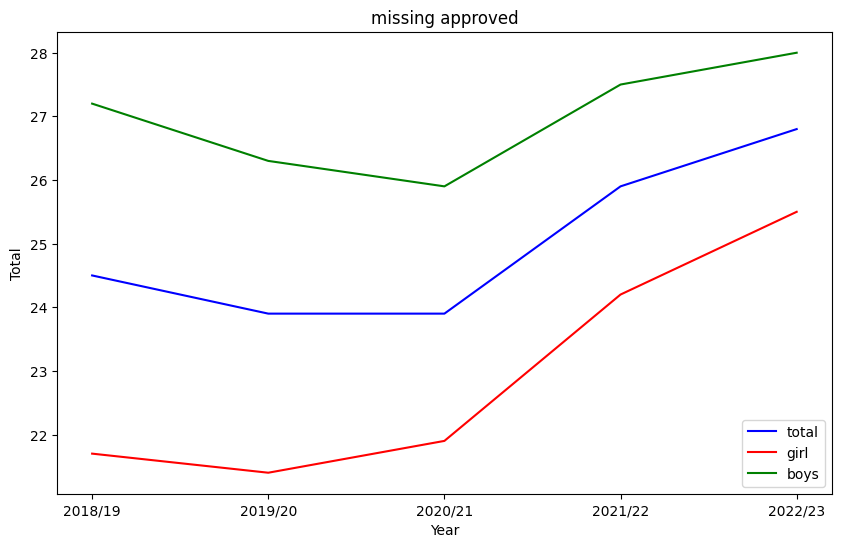

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))

plt.plot(df_fail["year"], df_fail["percentage"], label="total", color="blue")
plt.plot(df_fail["year"], df_fail["girls"], label="girl", color="red")
plt.plot(df_fail["year"], df_fail["boys"], label="boys", color="green")
plt.title("missing approved")
plt.xlabel("Year" )
plt.ylabel("Total")

plt.legend()

plt.show()